In [2]:
! pip install psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.9 MB/s eta 0:00:00a 0:00:01


In [61]:
import psycopg2

In [13]:
help(psycopg2.connect)

Help on function connect in module psycopg2:

connect(dsn=None, connection_factory=None, cursor_factory=None, **kwargs)
    Create a new database connection.
    
    The connection parameters can be specified as a string:
    
        conn = psycopg2.connect("dbname=test user=postgres password=secret")
    
    or using a set of keyword arguments:
    
        conn = psycopg2.connect(database="test", user="postgres", password="secret")
    
    Or as a mix of both. The basic connection parameters are:
    
    - *dbname*: the database name
    - *database*: the database name (only as keyword argument)
    - *user*: user name used to authenticate
    - *password*: password used to authenticate
    - *host*: database host address (defaults to UNIX socket if not provided)
    - *port*: connection port number (defaults to 5432 if not provided)
    
    Using the *connection_factory* parameter a different class or connections
    factory can be specified. It should be a callable object tak

In [41]:
! pip install pandas 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 19.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 19.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 6.8 MB/s eta 0:00:00a 0:00:01


In [62]:
from getpass import getpass
hosts = getpass("호스트 입력 :")
dbname = getpass("db 입력 :")
user = getpass("user 입력 :")
password = getpass("password 입력 :")
port = getpass("port 입력 :")
connection = psycopg2.connect(f"host={hosts} dbname={dbname} user={user} password={password} port={port}")

호스트 입력 : ········
db 입력 : ········
user 입력 : ········
password 입력 : ········
port 입력 : ········


In [63]:
import pandas as pd 

cursor = connection.cursor()

 
cursor.execute("select * from tourist_domestic;")
columns = [desc[0] for desc in cursor.description]
data = cursor.fetchall()
df = pd.DataFrame(data, columns=columns)

In [64]:
df

,age,ageCd,num,port,portCd,rnum,sex,sexCd,ym
0,0 - 10,10,36757,인천공항,IA,1,남성,M,202301
1,11 - 20,20,74567,인천공항,IA,1,남성,M,202301
2,21 - 30,30,119694,인천공항,IA,1,남성,M,202301
3,31 - 40,40,110655,인천공항,IA,1,남성,M,202301
4,41 - 50,50,125074,인천공항,IA,1,남성,M,202301
...,...,...,...,...,...,...,...,...,...
187,31 - 40,40,166737,인천공항,IA,1,여성,F,202312
188,41 - 50,50,136118,인천공항,IA,1,여성,F,202312
189,51 - 60,60,134455,인천공항,IA,1,여성,F,202312
190,61 - 70,70,85237,인천공항,IA,1,여성,F,202312


## EDA 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18528 entries, 0 to 18527
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18528 non-null  object
 1   ageCd   18528 non-null  object
 2   num     18528 non-null  object
 3   port    18528 non-null  object
 4   portCd  18528 non-null  object
 5   rnum    18528 non-null  object
 6   sex     18528 non-null  object
 7   sexCd   18528 non-null  object
 8   ym      18528 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


In [56]:
df.drop_duplicates().reset_index(drop=True)

,age,ageCd,num,port,portCd,rnum,sex,sexCd,ym
0,0 - 10,10,36757,인천공항,IA,1,남성,M,202301
1,11 - 20,20,74567,인천공항,IA,1,남성,M,202301
2,21 - 30,30,119694,인천공항,IA,1,남성,M,202301
3,31 - 40,40,110655,인천공항,IA,1,남성,M,202301
4,41 - 50,50,125074,인천공항,IA,1,남성,M,202301
...,...,...,...,...,...,...,...,...,...
187,31 - 40,40,166737,인천공항,IA,1,여성,F,202312
188,41 - 50,50,136118,인천공항,IA,1,여성,F,202312
189,51 - 60,60,134455,인천공항,IA,1,여성,F,202312
190,61 - 70,70,85237,인천공항,IA,1,여성,F,202312


## 데이터 수집에 문제

- 데이터 수집에 문제가 있는 것 같아 다시 수집한다.

In [65]:
df

,age,ageCd,num,port,portCd,rnum,sex,sexCd,ym
0,0 - 10,10,36757,인천공항,IA,1,남성,M,202301
1,11 - 20,20,74567,인천공항,IA,1,남성,M,202301
2,21 - 30,30,119694,인천공항,IA,1,남성,M,202301
3,31 - 40,40,110655,인천공항,IA,1,남성,M,202301
4,41 - 50,50,125074,인천공항,IA,1,남성,M,202301
...,...,...,...,...,...,...,...,...,...
187,31 - 40,40,166737,인천공항,IA,1,여성,F,202312
188,41 - 50,50,136118,인천공항,IA,1,여성,F,202312
189,51 - 60,60,134455,인천공항,IA,1,여성,F,202312
190,61 - 70,70,85237,인천공항,IA,1,여성,F,202312


## 수집은 성공적.... 이제 다른 데이터들도 수집을 해야겠다 

- 그전에 ... 짤막한 EDA

In [74]:
df.num

0       36757
1       74567
2      119694
3      110655
4      125074
        ...  
187    166737
188    136118
189    134455
190     85237
191     21123
Name: num, Length: 192, dtype: object

## 데이터 변형 

In [80]:
df.ageCd = df.ageCd.astype('int64')
df.num = df.num.astype('int64')


## Datetime 

- 양식의 문제로 자체 변형하여 재 출력

In [90]:
df.ym = df.ym.str[:4] + '-' + df.ym.str[4:6]

In [91]:
pd.to_datetime(df.ym)

0     2023-01-01
1     2023-01-01
2     2023-01-01
3     2023-01-01
4     2023-01-01
         ...    
187   2023-12-01
188   2023-12-01
189   2023-12-01
190   2023-12-01
191   2023-12-01
Name: ym, Length: 192, dtype: datetime64[ns]

In [92]:
df.ym = pd.to_datetime(df.ym)

## 연령대별 출국 인원 분포 

In [107]:
targets = round(df.groupby('ageCd')['num'].mean().to_frame('mean'),0)
targets

,mean
ageCd,
10,37201.0
20,46672.0
30,134416.0
40,139603.0
50,123204.0
60,115517.0
70,76094.0
80,20053.0


In [114]:
! pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 16.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.4/310.4 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 13.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 5.4 MB/s eta 0:00:00


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '10'),
  Text(1, 0, '20'),
  Text(2, 0, '30'),
  Text(3, 0, '40'),
  Text(4, 0, '50'),
  Text(5, 0, '60'),
  Text(6, 0, '70'),
  Text(7, 0, '80')])

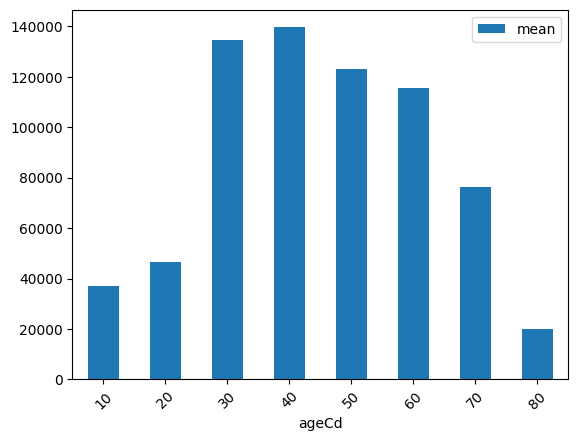

In [123]:
import matplotlib.pyplot as plt 
targets.plot(kind='bar')

## 성별별 출국 인원 분포

In [128]:
targets2 = round(df.groupby('sex')['num'].mean()).to_frame('mean')

In [130]:
targets2

,mean
sex,
남성,86500.0
여성,86690.0


In [133]:
! pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.0 MB/s eta 0:00:0000:0100:01


<Axes: xlabel='sex'>

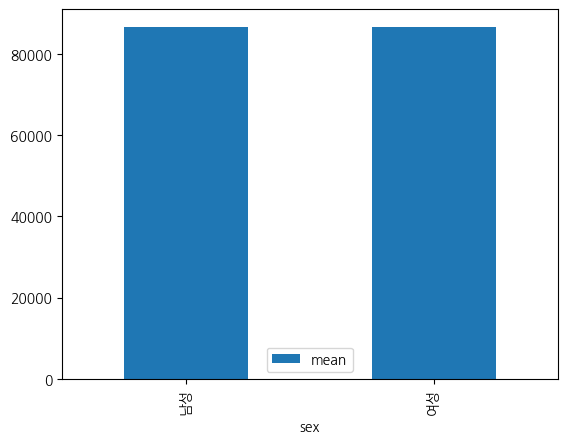

In [134]:
import koreanize_matplotlib

targets2.plot(kind='bar')


### 시간대별 출국 추세 

In [137]:
targets3 = df.groupby('ym')['num'].mean().to_frame()

targets3

,num
ym,
2023-01-01,83295.6875
2023-02-01,79255.1250
2023-03-01,66645.6875
2023-04-01,68983.5625
2023-05-01,78314.0000
2023-06-01,81838.9375
2023-07-01,99714.6250
2023-08-01,96164.3750
2023-09-01,93461.0000


<Axes: xlabel='ym'>

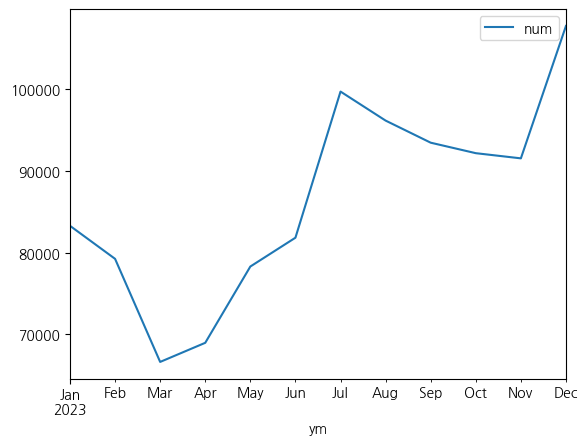

In [138]:
targets3.plot(kind='line')

In [139]:
df

,age,ageCd,num,port,portCd,rnum,sex,sexCd,ym
0,0 - 10,10,36757,인천공항,IA,1,남성,M,2023-01-01
1,11 - 20,20,74567,인천공항,IA,1,남성,M,2023-01-01
2,21 - 30,30,119694,인천공항,IA,1,남성,M,2023-01-01
3,31 - 40,40,110655,인천공항,IA,1,남성,M,2023-01-01
4,41 - 50,50,125074,인천공항,IA,1,남성,M,2023-01-01
...,...,...,...,...,...,...,...,...,...
187,31 - 40,40,166737,인천공항,IA,1,여성,F,2023-12-01
188,41 - 50,50,136118,인천공항,IA,1,여성,F,2023-12-01
189,51 - 60,60,134455,인천공항,IA,1,여성,F,2023-12-01
190,61 - 70,70,85237,인천공항,IA,1,여성,F,2023-12-01


## 통계적 가설검증 

1. 상반기, 하반기로 나눈다
2. 두 시기의 출국 인원 평균의 인원이 통계적으로 유의미하게 다른지에 대한 검정 

In [146]:
# 1. 분기 나누기 

df.ym = df.ym.dt.strftime('%Y-%m') 
df.ym


0      2023-01
1      2023-01
2      2023-01
3      2023-01
4      2023-01
        ...   
187    2023-12
188    2023-12
189    2023-12
190    2023-12
191    2023-12
Name: ym, Length: 192, dtype: object

In [158]:
first_half = df[df.ym.str[5:].astype('int64').between(1,6)]
second_half = df[df.ym.str[5:].astype('int64').between(7,12)]

In [160]:
상반기 = first_half.groupby('ym')['num'].mean()
하반기 = second_half.groupby('ym')['num'].mean()

In [161]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 12.2 MB/s eta 0:00:0000:0100:01


## Scipy를 통한 통계검증 

- 한 데이터 안의 데이터의 평균을 검증하기 위해, 쌍체표본 T-검증을 실시한다.
- 우선 정규성을 필요로 하는지 확인한다

In [162]:
from scipy.stats import shapiro 

In [166]:
stats_1, pval_1 = shapiro(상반기)
stats_1, pval_2 = shapiro(하반기)

In [169]:
display(pval_1, pval_2)

np.float64(0.21421872516943974)

np.float64(0.20222133789541868)

## 0.05 이하 

- 정규성 위배로 인해 T-검정은 실시하지 못한다.
- 그러므로 윌콕슨 검정을 시행

In [170]:
from scipy.stats import wilcoxon

In [172]:
w_stats, pval = wilcoxon(상반기, 하반기)

In [175]:
display(w_stats, pval)

np.float64(0.0)

np.float64(0.03125)

## 결론 


```
1. 0.03125로 기존에 우리가 알아내고자 했던, 상반기 하반기 두 시기의 출국 인원 평균의 인원이 통계적으로 유의미하게 다른지에 대한 검정은 유의미 하다고 볼 수 있다 그러나, 상반기, 하반기 데이터는 정규성을 검정할 수 없었기에, 윌콕스 검정으로 검정하여 신뢰성이 그리 높진 않은 편으로 확인이 된다.
2. 남성, 여성 할 것 없이 여행객은 달마다 증가하나, 7월과 12월이 가장 출국 인원들이 많을 시기인 것을 확인할 수 있으며,
3. 나이대로는 30,40대 인원이 가장 출국비율이 높은 것으로 확인이 되었다 .

```